In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nn(x, w): return np.sign(np.dot(x, w)).astype(int)

In [3]:
x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])

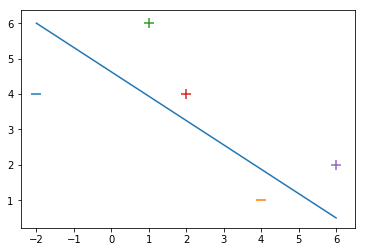

In [35]:
# https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/
for d, sample in enumerate(x):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

In [9]:
ld = 1 / 1000

In [4]:
n_samples, n_features = x.shape

In [5]:
w = np.zeros(n_features)

In [6]:
w

array([0., 0., 0.])

In [7]:
nn(x, w)

array([0, 0, 0, 0, 0])

In [8]:
np.sign([0, 10, -11])

array([ 0,  1, -1])

In [10]:
t

array([-1, -1,  1,  1,  1])

In [11]:
nn(x, w)

array([0, 0, 0, 0, 0])

In [12]:
np.multiply(t, nn(x, w))

array([0, 0, 0, 0, 0])

In [13]:
np.fmax(1 - np.multiply(t, nn(x, w)), 0)

array([1, 1, 1, 1, 1])

In [14]:
w

array([0., 0., 0.])

In [15]:
w ** 2

array([0., 0., 0.])

In [16]:
np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0) 

array([1., 1., 1., 1., 1.])

In [17]:
np.sum(np.multiply(t.reshape(-1,1), x), 0)

array([ 7,  7, -1])

In [18]:
t

array([-1, -1,  1,  1,  1])

In [19]:
t.T

array([-1, -1,  1,  1,  1])

In [20]:
t == t.T

array([ True,  True,  True,  True,  True])

In [21]:
np.sum(np.multiply(t.reshape(-1,1), x) * np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1), 0) 

array([ 7.,  7., -1.])

In [22]:
np.sum(np.fmax(1 - np.multiply(t, nn(x, w)), 0).reshape(-1, 1) + np.sum(ld * w ** 2, 0))

5.0

In [23]:
x, t.reshape(-1, 1), x * t.reshape(-1, 1)

(array([[-2,  4, -1],
        [ 4,  1, -1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]), array([[-1],
        [-1],
        [ 1],
        [ 1],
        [ 1]]), array([[ 2, -4,  1],
        [-4, -1,  1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]))

In [24]:
np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [178]:
def cost(y, t, w, ld): return np.sum(is_misclassified(w, x, t)) + ld * np.sum(w ** 2, 0)

In [179]:
def cost(y, t, w, ld): return np.sum(is_misclassified(w, x, t)) + ld * (np.linalg.norm(w, ord=2) ** 2)

In [180]:
def is_misclassified(w, x, t): return np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1)

In [181]:
def is_misclassified(w, x, t): return (np.multiply(t, np.dot(x, w)) < 1).astype(int).reshape(-1,1)

In [182]:
def gradient(w, x, t, ld): return np.sum((2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t), 0)

In [183]:
def delta_w(w, x, t, learning_rate, ld):
    return learning_rate * gradient(w, x, t, ld)

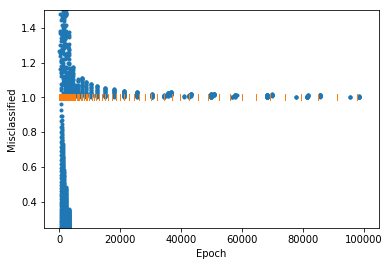

(0,
 0.004206024853792431,
 array([ 1.58876117,  3.17458055, 11.11863105]),
 array([ 3.19010824,  3.70734226, 19.91675431]))

In [184]:
learning_rate = 1; nb_of_iterations = 100000

w = np.zeros(n_features)
costs = []
costs_mis = []
w_ref = np.zeros(n_features)
cost_ref = 0
costs_ref = []
not_sames = []

w_cost = [(w, np.zeros(n_features), cost(nn(x, w), t, w, ld))]

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch
    
    # print((- learning_rate * ((2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t))))
    
    w = w - delta_w(w, x, t, learning_rate, ld)
    w_cost.append((w, is_misclassified(w, x, t), delta_w(w, x, t, learning_rate, ld), cost(nn(x, w), t, w, ld)))
    costs_mis.append(np.max(is_misclassified(w, x, t)) - 0.5)
    costs.append(cost(nn(x, w), t, w, ld))

    mis = is_misclassified(w_ref, x, t).reshape(-1, )
    cost_ref = 0
    not_same = 0.0
    delta_w_ref_sum = []
    for i, x_ in enumerate(x):  
        if (t[i] * np.dot(x[i], w_ref)) < 1:
            delta_w_ref = learning_rate * ( (x[i] * t[i]) + (-2 * ld * w_ref) )
            cost_ref = 1
            if mis[i] != 1:
                not_same = 1.3
        else:
            delta_w_ref = learning_rate * (-2 * ld * w_ref)
            if mis[i] != 0:
                not_same = 1.3
                
        w_ref = w_ref + delta_w_ref
        delta_w_ref_sum.append(delta_w_ref)
        # print(delta_w_ref)
    # print(delta_w_ref_sum)        
                
    costs_ref.append(cost_ref)
    not_sames.append(not_same)
    
# plt.plot(costs_mis, 'o')
plt.plot(costs, '.')
plt.plot(costs_ref, '|') 
# plt.plot(not_sames, 's')
plt.ylim(0.25, 1.5)
# plt.axes().set_yticklabels([])
plt.xlabel('Epoch')
plt.ylabel('Misclassified')
plt.show()

costs_ref[-1], costs[-1], w_ref, w

In [78]:
mis_raw = np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0)
mis_raw

array([1., 1., 0., 0., 0.])

In [76]:
x * t.reshape(-1, 1)

array([[ 2, -4,  1],
       [-4, -1,  1],
       [ 1,  6, -1],
       [ 2,  4, -1],
       [ 6,  2, -1]])

In [82]:
mis_raw, x, t

(array([1., 1., 0., 0., 0.]), array([[-2,  4, -1],
        [ 4,  1, -1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]), array([-1, -1,  1,  1,  1]))

In [84]:
x * t.reshape(-1, 1) * mis_raw.reshape(-1, 1)

array([[ 2., -4.,  1.],
       [-4., -1.,  1.],
       [ 0.,  0., -0.],
       [ 0.,  0., -0.],
       [ 0.,  0., -0.]])

In [93]:
mis_raw.shape

(5,)

In [98]:
mis_raw.reshape(-1, 1).reshape(-1, )

array([1., 1., 0., 0., 0.])

In [103]:
(np.multiply(t, np.dot(x, w)) < 1).astype(int)

array([0, 0, 0, 0, 0])

In [104]:
np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [108]:
x * t.reshape(-1, 1) * is_misclassified(w, x, t)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [111]:
a = (2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t)
b = np.sum(a, 0)
a, b

(array([[6.38028029e-05, 7.41475867e-05, 3.98339070e-04],
        [6.38028029e-05, 7.41475867e-05, 3.98339070e-04],
        [6.38028029e-05, 7.41475867e-05, 3.98339070e-04],
        [6.38028029e-05, 7.41475867e-05, 3.98339070e-04],
        [6.38028029e-05, 7.41475867e-05, 3.98339070e-04]]),
 array([0.00031901, 0.00037074, 0.0019917 ]))

In [114]:
cost(nn(x, w), t, w, ld)

4.206066914461575e-08

In [116]:
ld * w ** 2, 0

(array([0.00010177, 0.00013745, 0.00396681]), 0)

In [125]:
w, np.sum(w ** 2, 0), np.linalg.norm(w, ord=2) ** 2

(array([ 3.19010824,  3.70734226, 19.91675431]),
 420.5982793543892,
 420.59827935438926)

In [168]:
def nn(x, w): return np.sign(np.dot(x, w)).astype(int)
x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])
def cost(y, t, w, ld): return np.sum(is_misclassified(w, x, t)) + ld * (np.linalg.norm(w, ord=2) ** 2)
def is_misclassified(w, x, t): return (np.multiply(t, np.dot(x, w)) < 1).astype(int).reshape(-1,1)
def gradient(w, x, t, ld): return np.sum((2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t), 0)
def delta_w(w, x, t, learning_rate, ld): return learning_rate * gradient(w, x, t, ld)

learning_rate = 1; nb_of_iterations = 100000

w = np.zeros(n_features)
costs = []

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch    
    w = w - delta_w(w, x, t, learning_rate, ld)
    costs.append(cost(nn(x, w), t, w, ld))

w, costs[:5], costs[-5:]

(array([ 3.19010824,  3.70734226, 19.91675431]),
 [101.0, 1015.5, 4819.0, 8617.687500000002, 8072.150000000001],
 [0.004209559656618149,
  0.004208675664246879,
  0.004207791866348653,
  0.004206908262878743,
  0.004206024853792431])

In [177]:
def nn(x, w): return np.sign(np.dot(x, w)).astype(int)
def cost(y, t, w, ld): return is_misclassified(w, x, t) + ld * (np.linalg.norm(w, ord=2) ** 2)
def is_misclassified(w, x, t): return (t * np.dot(x, w) < 1).astype(int)
def gradient(w, x, t, ld): return 2 * ld * w - x * t * is_misclassified(w, x, t)

x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])
learning_rate = 1; nb_of_iterations = 100000; w = np.zeros(n_features); costs = []

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch
    error = 0
    for i, x_ in enumerate(x):              
        w = w - learning_rate * gradient(w, x[i], t[i], ld)
        # costs.append(cost(nn(x, w), t, w, ld))
        if is_misclassified(w, x[i], t[i]):
            error = 1
    costs.append(error)

w, costs[:5], costs[-5:]

(array([ 1.58876117,  3.17458055, 11.11863105]),
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0])